In [36]:
import cv2 # should be 4.7
import glob
import matplotlib.pyplot as plt
import cv2.aruco as aruco
import numpy as np

print( cv2.__version__)

4.7.0


In [37]:
# OUR FINAL CAMERA CALIBRATION MATRIX
calibration = 0.6442544274536695
cameraMatrix = np.array([[932.35252209,   0.,         657.24325896],
 [  0.,         930.23581552, 357.42939289],
 [  0.,           0.,           1.        ]])
distCoeffs = np.array([[ 1.76279343e-01, -6.07952723e-01, -4.64176532e-04, -4.96839648e-04, 6.04867450e-01]])

In [38]:
def produce_cube_points(x, z):
    y = 1.3
    A = np.array([[x, y, z],
                  [x, y -  6., z],
                  [x - 6., y -  6., z],
                  [x - 6., y, z],
                  [x, y, z + 6.],
                  [x, y -  6., z + 6.],
                  [x - 6., y -  6., z + 6.],
                  [x - 6., y, z + 6.]])
    return A

In [39]:
RELATIVE_PATH_CUBE = './*.jpg'
images_cube = sorted(glob.glob(RELATIVE_PATH_CUBE))
print(len(images_cube))

points3dOnCube = np.array([
                        [[-1.15, 1.3, 16.],
                        [2.05, 1.3, 21.0],
                        [-3.35, 1.3, 24.1],
                        [-6.3, 1.3, 19.],
                        [-1.15, -4.7, 16.],
                        [2.05, -4.7, 21.0],
                        [-3.35, -4.7, 24.1],
                        [-6.3, -4.7, 19.]],
                        produce_cube_points(-3., 20.)
                        ])


2


./photo_000_2023-04-19.jpg
points3dOnCube1:   [[ -1.15   1.3   16.  ]
 [  2.05   1.3   21.  ]
 [ -3.35   1.3   24.1 ]
 [ -6.3    1.3   19.  ]
 [ -4.4    1.3   27.  ]
 [ -4.4   -4.7   27.  ]
 [-10.     1.3   29.7 ]
 [-10.    -4.7   29.7 ]]
point_2d:   [[[594 429]]

 [[744 412]]

 [[532 406]]

 [[360 419]]

 [[510 401]]

 [[510 200]]

 [[350 397]]

 [[349 213]]]


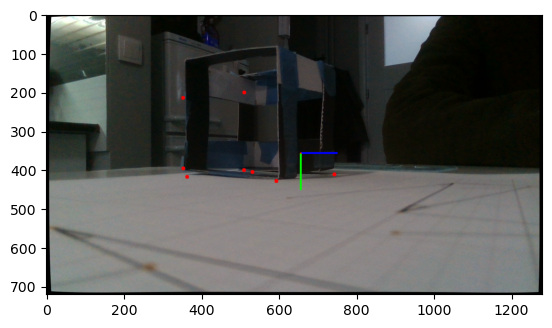

./photo_001_2023-04-19.jpg
points3dOnCube1:   [[-3.   1.3 20. ]
 [-3.  -4.7 20. ]
 [-9.  -4.7 20. ]
 [-9.   1.3 20. ]
 [-3.   1.3 26. ]
 [-3.  -4.7 26. ]
 [-9.  -4.7 26. ]
 [-9.   1.3 26. ]]
point_2d:   [[[524 415]]

 [[523 147]]

 [[251 146]]

 [[251 416]]

 [[553 402]]

 [[553 194]]

 [[342 193]]

 [[342 403]]]


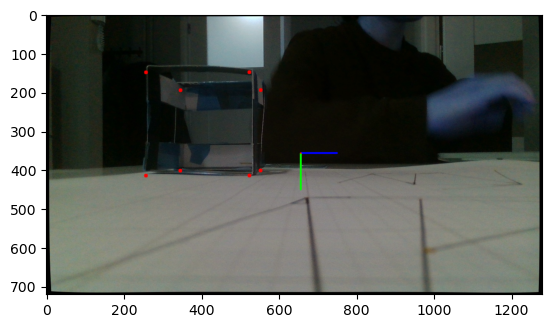

In [40]:
count = 0
for i in range(len(images_cube)):
    if i <= 100:
        points3dOnCube1 = points3dOnCube[i]
        print(images_cube[i])
        img = cv2.imread(images_cube[i])
        
        img = cv2.drawFrameAxes(img, cameraMatrix, distCoeffs, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), 0.1) # draw the chessboard coordinate system

        # project the 3D point onto the image
        point_2d, _ = cv2.projectPoints(points3dOnCube1, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), cameraMatrix, distCoeffs)

        # round the pixel coordinates to integers
        point_2d = np.round(point_2d).astype(np.int32)
        
        print("points3dOnCube1:  ", points3dOnCube1)
        print("point_2d:  ", point_2d)
        colors=[(0, 0, 255), (0, 255, 0), (255, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0)]
    
        for x, y in point_2d[:,0,:]:
            img = cv2.circle(img, (x, y), radius=5, color=(255,0,0), thickness=-1)
            i += 1

        img = cv2.undistort(img, cameraMatrix, distCoeffs, None, cameraMatrix) # undistort the image (get's crazy)

        # uncomment this to see the result!
        plt.imshow(img)
        plt.show()
    
    count += 1